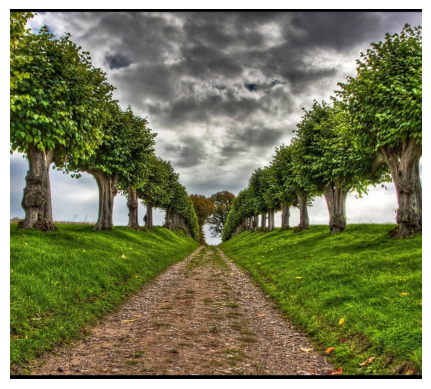

In [46]:
# Import des bibliothèques nécessaires
from PIL import Image
import matplotlib.pyplot as plt

# Charger l'image
image_path = 'image1.jpg'  # Remplace par le chemin de ton image
image1 = Image.open(image_path)

# Afficher l'image
plt.imshow(image1)
plt.axis('off')  # Masquer les axes pour une meilleure visualisation
plt.show()

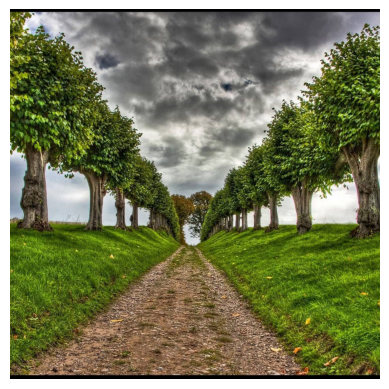

In [47]:
new_size = (int(image1.size[1]), int(image1.size[1]))
resized_image1 = image1.resize(new_size)

# Afficher l'image redimensionnée
plt.imshow(resized_image1)
plt.axis('off')
plt.show()

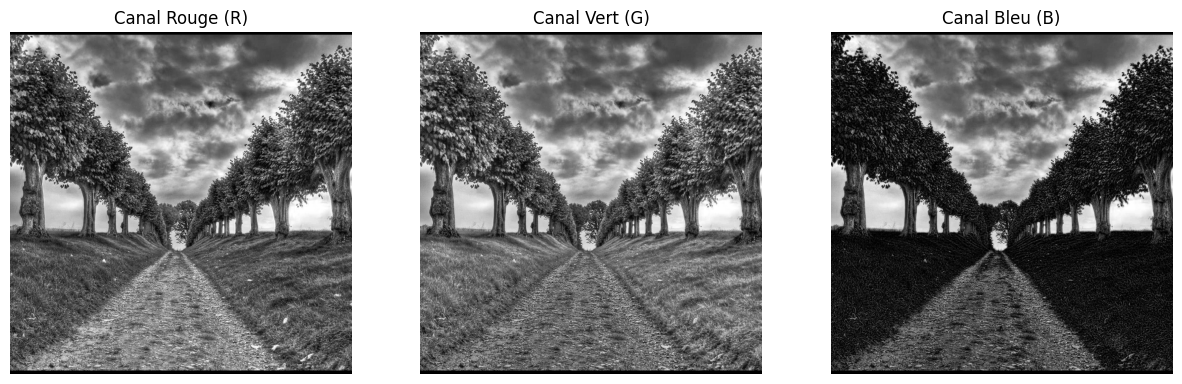

In [48]:
# Extraire chaque canal
r, g, b = resized_image1.split()

# Afficher les canaux R, G, B séparément
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(r, cmap='gray')
axes[0].set_title('Canal Rouge (R)')
axes[0].axis('off')

axes[1].imshow(g, cmap='gray')
axes[1].set_title('Canal Vert (G)')
axes[1].axis('off')

axes[2].imshow(b, cmap='gray')
axes[2].set_title('Canal Bleu (B)')
axes[2].axis('off')

plt.show()

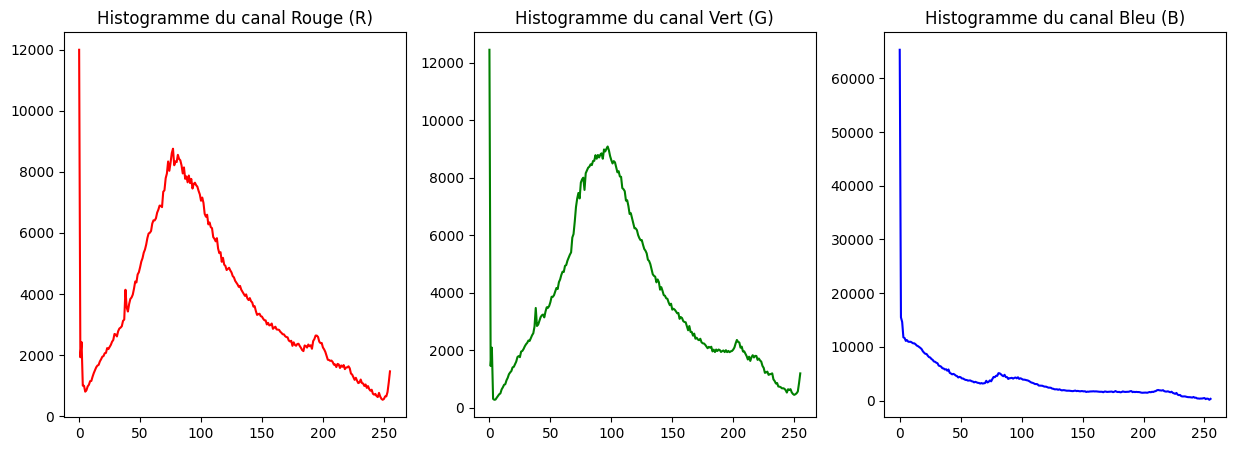

In [49]:
# Obtenir les histogrammes
r_hist = r.histogram()
g_hist = g.histogram()
b_hist = b.histogram()

# Afficher les histogrammes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogramme du canal rouge
axes[0].plot(r_hist, color='red')
axes[0].set_title("Histogramme du canal Rouge (R)")

# Histogramme du canal vert
axes[1].plot(g_hist, color='green')
axes[1].set_title("Histogramme du canal Vert (G)")

# Histogramme du canal bleu
axes[2].plot(b_hist, color='blue')
axes[2].set_title("Histogramme du canal Bleu (B)")

# Afficher les résultats
plt.show()

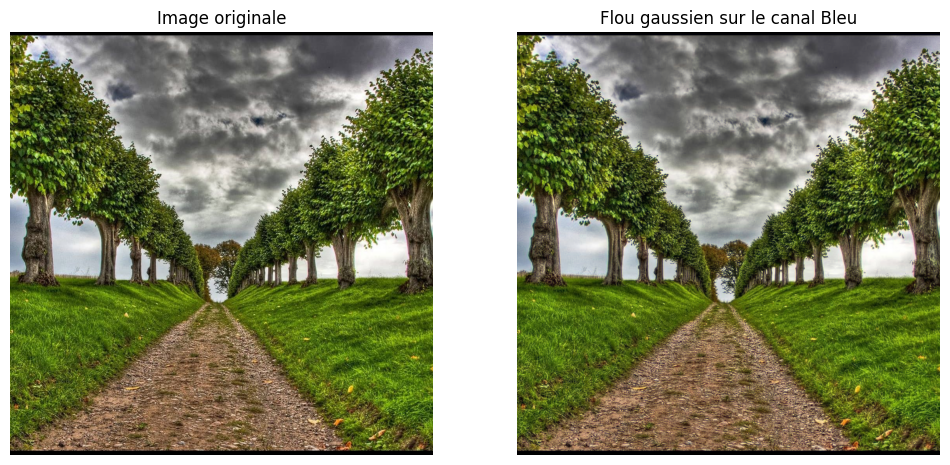

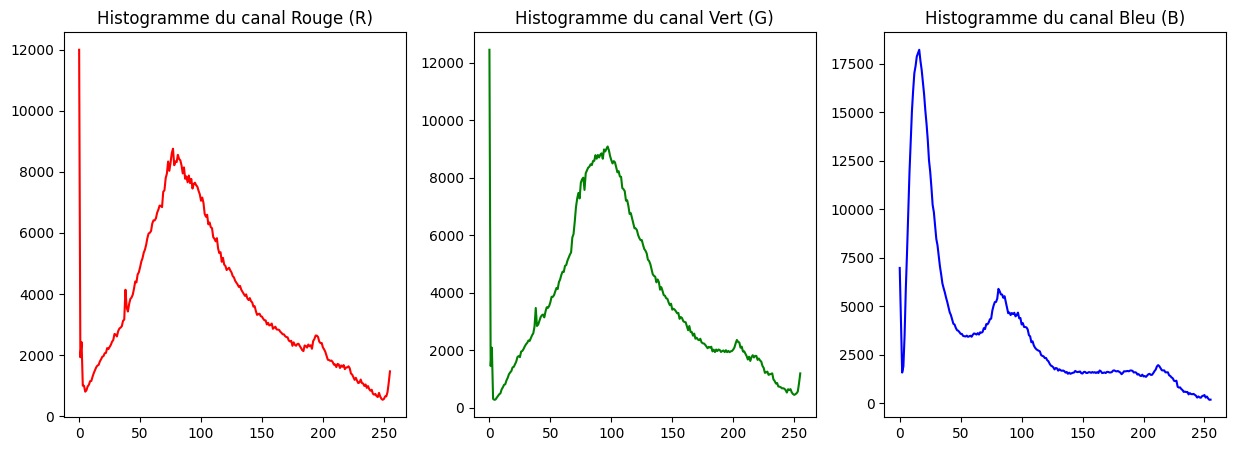

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Assumer que resized_image1 est déjà une image PIL
# Convertir resized_image1 en format utilisable par OpenCV
image_cv = cv2.cvtColor(np.array(resized_image1), cv2.COLOR_RGB2BGR)

# Séparer les canaux R, G, B
b, g, r = cv2.split(image_cv)

# Appliquer un flou gaussien uniquement sur le canal bleu
b_blurred = cv2.GaussianBlur(b, (15, 15), 1.175)

# Recombiner les canaux R, G non modifiés et le canal bleu flouté
image_cv_blurred_b = cv2.merge([b_blurred, g, r])

# Convertir l'image de sortie en format RGB pour l'affichage avec matplotlib
blurred_image_rgb = cv2.cvtColor(image_cv_blurred_b, cv2.COLOR_BGR2RGB)

# Afficher l'image d'origine et l'image modifiée
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(resized_image1)
axes[0].set_title("Image originale")
axes[0].axis('off')

axes[1].imshow(blurred_image_rgb)
axes[1].set_title("Flou gaussien sur le canal Bleu")
axes[1].axis('off')

plt.show()

# Convertir l'image floutée en format PIL
image_pil = Image.fromarray(blurred_image_rgb)

# Extraire les canaux R, G, B avec PIL (ils seront dans le bon ordre RGB)
r, g, b = image_pil.split()

# Obtenir les histogrammes
r_hist = r.histogram()
g_hist = g.histogram()
b_hist = b.histogram()

# Afficher les histogrammes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogramme du canal rouge
axes[0].plot(r_hist, color='red')
axes[0].set_title("Histogramme du canal Rouge (R)")

# Histogramme du canal vert
axes[1].plot(g_hist, color='green')
axes[1].set_title("Histogramme du canal Vert (G)")

# Histogramme du canal bleu
axes[2].plot(b_hist, color='blue')
axes[2].set_title("Histogramme du canal Bleu (B)")

# Afficher les résultats
plt.show()


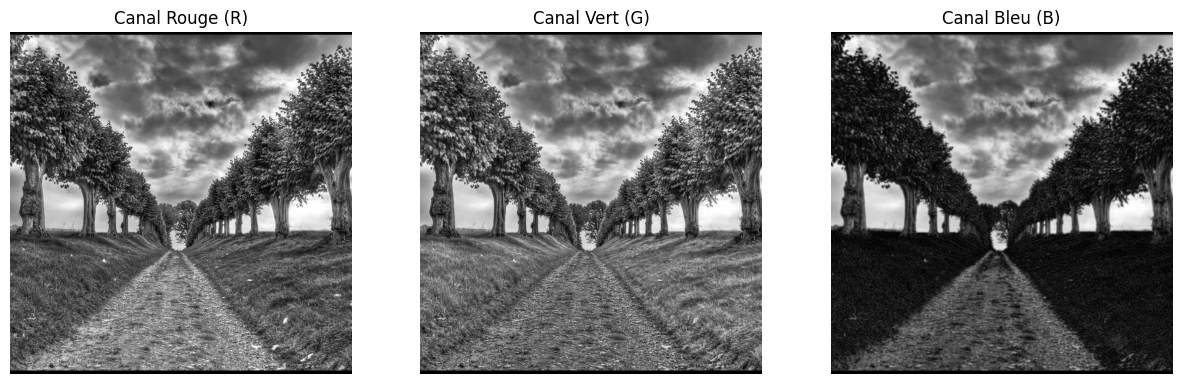

In [54]:
# Convertir l'image floutée en format PIL
image_pil = Image.fromarray(blurred_image_rgb)

# Extraire les canaux R, G, B avec PIL (ils seront dans le bon ordre RGB)
r, g, b = image_pil.split()

# Afficher les canaux R, G, B séparément
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(r, cmap='gray')
axes[0].set_title('Canal Rouge (R)')
axes[0].axis('off')

axes[1].imshow(g, cmap='gray')
axes[1].set_title('Canal Vert (G)')
axes[1].axis('off')

axes[2].imshow(b, cmap='gray')
axes[2].set_title('Canal Bleu (B)')
axes[2].axis('off')

plt.show()

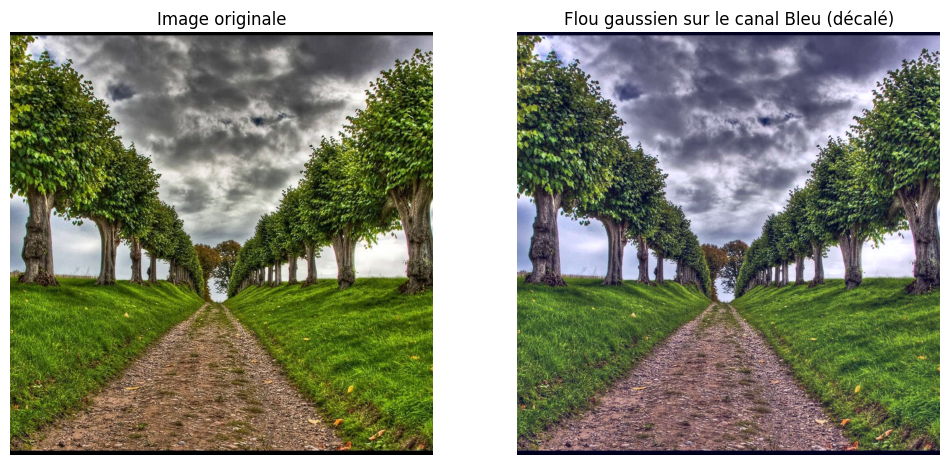

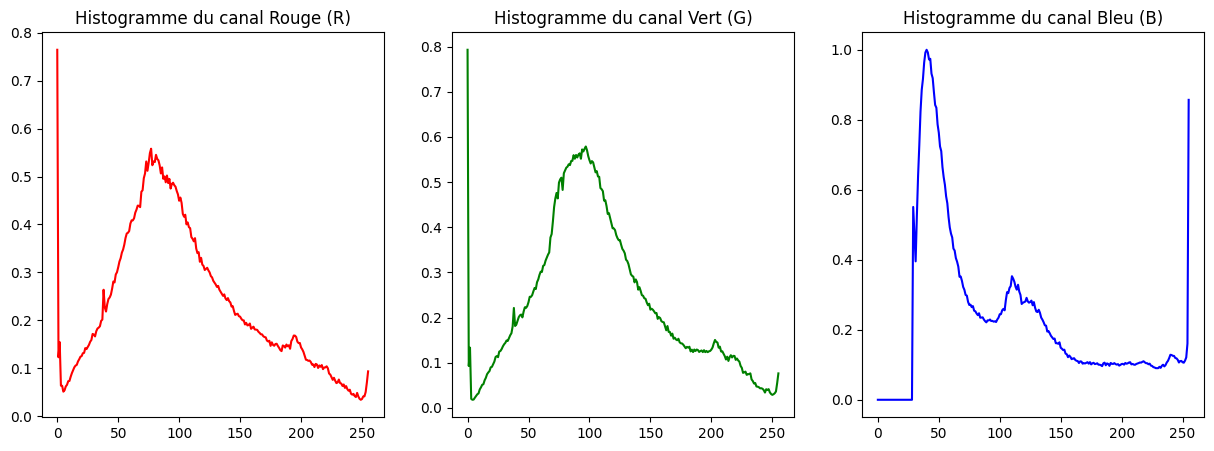

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Assumer que resized_image1 est déjà une image PIL
# Convertir resized_image1 en format utilisable par OpenCV
image_cv = cv2.cvtColor(np.array(resized_image1), cv2.COLOR_RGB2BGR)

# Séparer les canaux R, G, B
b, g, r = cv2.split(image_cv)

# Décalage des valeurs du canal bleu vers la droite (vers 100)
shift_value = 100 - np.mean(b)  # Calculer le décalage nécessaire pour déplacer le pic vers 100
b_shifted = cv2.add(b, shift_value)

# Assurer que les valeurs restent dans la plage [0, 255]
b_shifted = np.clip(b_shifted, 0, 255)

# Appliquer un flou gaussien uniquement sur le canal bleu (ou déplacé)
b_blurred = cv2.GaussianBlur(b_shifted, (15, 15), 0.75)

# Recombiner les canaux R, G non modifiés et le canal bleu flouté
image_cv_blurred_b = cv2.merge([b_blurred, g, r])

# Convertir l'image de sortie en format RGB pour l'affichage avec matplotlib
blurred_image_rgb = cv2.cvtColor(image_cv_blurred_b, cv2.COLOR_BGR2RGB)

# Afficher l'image d'origine et l'image modifiée
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(resized_image1)
axes[0].set_title("Image originale")
axes[0].axis('off')

axes[1].imshow(blurred_image_rgb)
axes[1].set_title("Flou gaussien sur le canal Bleu (décalé)")
axes[1].axis('off')

plt.show()

# Convertir l'image floutée en format PIL
image_pil = Image.fromarray(blurred_image_rgb)

# Extraire les canaux R, G, B avec PIL (ils seront dans le bon ordre RGB)
r, g, b = image_pil.split()

# Obtenir les histogrammes
r_hist = r.histogram()
g_hist = g.histogram()
b_hist = b.histogram()

# Normaliser les histogrammes pour avoir la même échelle
r_max = max(r_hist)
g_max = max(g_hist)
b_max = max(b_hist)

# Trouver la valeur maximale parmi les trois histogrammes
max_val = max(r_max, g_max, b_max)

# Normaliser les histogrammes pour avoir la même échelle
r_hist_normalized = [value / max_val for value in r_hist]
g_hist_normalized = [value / max_val for value in g_hist]
b_hist_normalized = [value / max_val for value in b_hist]

# Afficher les histogrammes normalisés
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogramme du canal rouge
axes[0].plot(r_hist_normalized, color='red')
axes[0].set_title("Histogramme du canal Rouge (R)")

# Histogramme du canal vert
axes[1].plot(g_hist_normalized, color='green')
axes[1].set_title("Histogramme du canal Vert (G)")

# Histogramme du canal bleu
axes[2].plot(b_hist_normalized, color='blue')
axes[2].set_title("Histogramme du canal Bleu (B)")

# Afficher les résultats
plt.show()